## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
/Users/chibaryowei/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/chibaryowei/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/chibaryowei/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/chibaryowei/anaconda3/lib/pytho

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
"""
Compile 模型: Adam
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0713 20:52:25.245974 4646680000 deprecation_wrapper.py:119] From /Users/chibaryowei/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 20:52:25.266929 4646680000 deprecation_wrapper.py:119] From /Users/chibaryowei/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 20:52:25.271574 4646680000 deprecation_wrapper.py:119] From /Users/chibaryowei/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0713 20:52:25.363621 4646680000 deprecation_wrapper.py:119] From /Users/chibaryowei/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W071

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0713 20:52:56.339685 4646680000 deprecation.py:323] From /Users/chibaryowei/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0713 20:52:56.407237 4646680000 deprecation_wrapper.py:119] From /Users/chibaryowei/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 10s 192us/step - loss: 1.9250 - acc: 0.3035 - val_loss: 1.7688 - val_acc: 0.3644
Epoch 2/500
50000/50000 [==============================] - 9s 183us/step - loss: 1.6994 - acc: 0.3934 - val_loss: 1.6509 - val_acc: 0.4084
Epoch 3/500
50000/50000 [==============================] - 9s 185us/step - loss: 1.6036 - acc: 0.4283 - val_loss: 1.5800 - val_acc: 0.4262
Epoch 4/500
50000/50000 [==============================] - 9s 186us/step - loss: 1.5429 - acc: 0.4483 - val_loss: 1.5304 - val_acc: 0.4552
Epoch 5/500
50000/50000 [==============================] - 9s 185us/step - loss: 1.4982 - acc: 0.4657 - val_loss: 1.4982 - val_acc: 0.4670
Epoch 6/500
50000/50000 [==============================] - 9s 187us/step - loss: 1.4544 - acc: 0.4821 - val_loss: 1.4581 - val_acc: 0.4791
Epoch 7/500
50000/50000 [==============================] - 9s 185us/step - loss: 1.4318 - acc: 0.4892 - val_loss: 1

Epoch 59/500
50000/50000 [==============================] - 13s 251us/step - loss: 0.5481 - acc: 0.8046 - val_loss: 1.9861 - val_acc: 0.5153
Epoch 60/500
50000/50000 [==============================] - 11s 226us/step - loss: 0.5365 - acc: 0.8078 - val_loss: 2.0288 - val_acc: 0.5111
Epoch 61/500
50000/50000 [==============================] - 11s 227us/step - loss: 0.5400 - acc: 0.8057 - val_loss: 2.0718 - val_acc: 0.5050
Epoch 62/500
50000/50000 [==============================] - 12s 247us/step - loss: 0.5248 - acc: 0.8108 - val_loss: 2.0996 - val_acc: 0.5047
Epoch 63/500
50000/50000 [==============================] - 10s 191us/step - loss: 0.5089 - acc: 0.8174 - val_loss: 2.1351 - val_acc: 0.5003
Epoch 64/500
50000/50000 [==============================] - 9s 180us/step - loss: 0.5087 - acc: 0.8167 - val_loss: 2.1492 - val_acc: 0.5054
Epoch 65/500
50000/50000 [==============================] - 9s 181us/step - loss: 0.4934 - acc: 0.8207 - val_loss: 2.1796 - val_acc: 0.5112
Epoch 66/500
50

50000/50000 [==============================] - 14s 273us/step - loss: 0.2732 - acc: 0.9028 - val_loss: 3.3926 - val_acc: 0.4971
Epoch 118/500
50000/50000 [==============================] - 12s 245us/step - loss: 0.2432 - acc: 0.9126 - val_loss: 3.4373 - val_acc: 0.4914
Epoch 119/500
50000/50000 [==============================] - 12s 246us/step - loss: 0.2609 - acc: 0.9072 - val_loss: 3.3536 - val_acc: 0.4936
Epoch 120/500
50000/50000 [==============================] - 15s 302us/step - loss: 0.2469 - acc: 0.9116 - val_loss: 3.4698 - val_acc: 0.4963
Epoch 121/500
50000/50000 [==============================] - 15s 300us/step - loss: 0.2226 - acc: 0.9208 - val_loss: 3.5691 - val_acc: 0.4823
Epoch 122/500
50000/50000 [==============================] - 13s 251us/step - loss: 0.2748 - acc: 0.9012 - val_loss: 3.4306 - val_acc: 0.4923
Epoch 123/500
50000/50000 [==============================] - 12s 237us/step - loss: 0.2277 - acc: 0.9187 - val_loss: 3.5336 - val_acc: 0.4877
Epoch 124/500
50000/

Epoch 175/500
50000/50000 [==============================] - 10s 205us/step - loss: 0.1626 - acc: 0.9424 - val_loss: 4.2527 - val_acc: 0.4892
Epoch 176/500
50000/50000 [==============================] - 13s 256us/step - loss: 0.1689 - acc: 0.9410 - val_loss: 4.3075 - val_acc: 0.4841
Epoch 177/500
50000/50000 [==============================] - 17s 342us/step - loss: 0.1919 - acc: 0.9325 - val_loss: 4.3091 - val_acc: 0.4888
Epoch 178/500
50000/50000 [==============================] - 20s 405us/step - loss: 0.1654 - acc: 0.9423 - val_loss: 4.3034 - val_acc: 0.4879
Epoch 179/500
50000/50000 [==============================] - 15s 296us/step - loss: 0.1831 - acc: 0.9348 - val_loss: 4.1754 - val_acc: 0.4933
Epoch 180/500
50000/50000 [==============================] - 16s 327us/step - loss: 0.1705 - acc: 0.9400 - val_loss: 4.2659 - val_acc: 0.4859
Epoch 181/500
50000/50000 [==============================] - 15s 307us/step - loss: 0.1538 - acc: 0.9458 - val_loss: 4.2070 - val_acc: 0.4966
Epoch 

Epoch 233/500
50000/50000 [==============================] - 12s 232us/step - loss: 0.1080 - acc: 0.9622 - val_loss: 4.5719 - val_acc: 0.4922
Epoch 234/500
50000/50000 [==============================] - 11s 226us/step - loss: 0.0790 - acc: 0.9719 - val_loss: 4.5808 - val_acc: 0.4966
Epoch 235/500
50000/50000 [==============================] - 12s 236us/step - loss: 0.0620 - acc: 0.9791 - val_loss: 4.6491 - val_acc: 0.4966
Epoch 236/500
50000/50000 [==============================] - 15s 292us/step - loss: 0.1464 - acc: 0.9501 - val_loss: 4.7006 - val_acc: 0.4834
Epoch 237/500
50000/50000 [==============================] - 11s 229us/step - loss: 0.2531 - acc: 0.9182 - val_loss: 4.6652 - val_acc: 0.4857
Epoch 238/500
50000/50000 [==============================] - 12s 236us/step - loss: 0.1294 - acc: 0.9564 - val_loss: 4.5743 - val_acc: 0.4940
Epoch 239/500
50000/50000 [==============================] - 12s 233us/step - loss: 0.1188 - acc: 0.9578 - val_loss: 4.5602 - val_acc: 0.4996
Epoch 

Epoch 291/500
50000/50000 [==============================] - 18s 365us/step - loss: 0.2098 - acc: 0.9346 - val_loss: 4.8074 - val_acc: 0.4881
Epoch 292/500
50000/50000 [==============================] - 16s 316us/step - loss: 0.1058 - acc: 0.9628 - val_loss: 4.8312 - val_acc: 0.4902
Epoch 293/500
50000/50000 [==============================] - 13s 252us/step - loss: 0.0808 - acc: 0.9722 - val_loss: 4.8485 - val_acc: 0.4910
Epoch 294/500
50000/50000 [==============================] - 12s 250us/step - loss: 0.0493 - acc: 0.9831 - val_loss: 4.8687 - val_acc: 0.5018
Epoch 295/500
50000/50000 [==============================] - 13s 259us/step - loss: 0.0392 - acc: 0.9869 - val_loss: 4.9862 - val_acc: 0.4996
Epoch 296/500
50000/50000 [==============================] - 12s 241us/step - loss: 0.1069 - acc: 0.9644 - val_loss: 4.8877 - val_acc: 0.4814
Epoch 297/500
50000/50000 [==============================] - 12s 238us/step - loss: 0.3336 - acc: 0.9027 - val_loss: 4.8255 - val_acc: 0.4837
Epoch 

Epoch 349/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.1091 - acc: 0.9629 - val_loss: 4.9796 - val_acc: 0.4923
Epoch 350/500
50000/50000 [==============================] - 9s 183us/step - loss: 0.0722 - acc: 0.9754 - val_loss: 5.0348 - val_acc: 0.4960
Epoch 351/500
50000/50000 [==============================] - 12s 234us/step - loss: 0.1389 - acc: 0.9548 - val_loss: 5.0316 - val_acc: 0.4911
Epoch 352/500
50000/50000 [==============================] - 13s 252us/step - loss: 0.1192 - acc: 0.9603 - val_loss: 4.9664 - val_acc: 0.4965
Epoch 353/500
50000/50000 [==============================] - 10s 204us/step - loss: 0.0570 - acc: 0.9807 - val_loss: 5.0399 - val_acc: 0.4902
Epoch 354/500
50000/50000 [==============================] - 10s 190us/step - loss: 0.1331 - acc: 0.9561 - val_loss: 4.9855 - val_acc: 0.4936
Epoch 355/500
50000/50000 [==============================] - 10s 191us/step - loss: 0.1287 - acc: 0.9580 - val_loss: 4.9625 - val_acc: 0.4988
Epoch 3

Epoch 407/500
50000/50000 [==============================] - 9s 181us/step - loss: 0.0558 - acc: 0.9810 - val_loss: 5.0512 - val_acc: 0.4944
Epoch 408/500
50000/50000 [==============================] - 9s 182us/step - loss: 0.0225 - acc: 0.9932 - val_loss: 5.0470 - val_acc: 0.4992
Epoch 409/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0069 - acc: 0.9992 - val_loss: 5.0864 - val_acc: 0.5022
Epoch 410/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.0073 - acc: 0.9988 - val_loss: 5.1070 - val_acc: 0.5034
Epoch 411/500
50000/50000 [==============================] - 9s 181us/step - loss: 0.0063 - acc: 0.9991 - val_loss: 5.1866 - val_acc: 0.5017
Epoch 412/500
50000/50000 [==============================] - 9s 181us/step - loss: 0.0041 - acc: 0.9996 - val_loss: 5.1783 - val_acc: 0.5040
Epoch 413/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.3919 - acc: 0.9093 - val_loss: 4.9535 - val_acc: 0.4734
Epoch 414/500

Epoch 465/500
50000/50000 [==============================] - 12s 237us/step - loss: 0.0470 - acc: 0.9853 - val_loss: 4.7181 - val_acc: 0.5029
Epoch 466/500
50000/50000 [==============================] - 12s 240us/step - loss: 0.1522 - acc: 0.9502 - val_loss: 4.8028 - val_acc: 0.4848
Epoch 467/500
50000/50000 [==============================] - 15s 299us/step - loss: 0.1579 - acc: 0.9490 - val_loss: 4.6986 - val_acc: 0.4969
Epoch 468/500
50000/50000 [==============================] - 11s 224us/step - loss: 0.0513 - acc: 0.9829 - val_loss: 4.7454 - val_acc: 0.5011
Epoch 469/500
50000/50000 [==============================] - 10s 191us/step - loss: 0.0258 - acc: 0.9931 - val_loss: 4.8668 - val_acc: 0.4997
Epoch 470/500
50000/50000 [==============================] - 10s 191us/step - loss: 0.0124 - acc: 0.9976 - val_loss: 4.8614 - val_acc: 0.5022
Epoch 471/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0548 - acc: 0.9824 - val_loss: 4.9238 - val_acc: 0.4868
Epoch 4

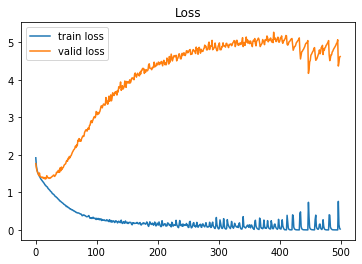

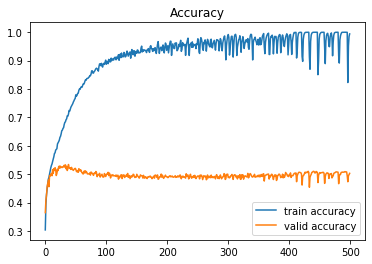

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [9]:
"""
Compile 模型: sgd

"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.sgd(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [10]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 8s 169us/step - loss: 2.2654 - acc: 0.1579 - val_loss: 2.2190 - val_acc: 0.2127
Epoch 2/500
50000/50000 [==============================] - 8s 157us/step - loss: 2.1921 - acc: 0.2247 - val_loss: 2.1630 - val_acc: 0.2502
Epoch 3/500
50000/50000 [==============================] - 7s 144us/step - loss: 2.1400 - acc: 0.2520 - val_loss: 2.1147 - val_acc: 0.2698
Epoch 4/500
50000/50000 [==============================] - 10s 194us/step - loss: 2.0952 - acc: 0.2698 - val_loss: 2.0746 - val_acc: 0.2797
Epoch 5/500
50000/50000 [==============================] - 10s 191us/step - loss: 2.0582 - acc: 0.2842 - val_loss: 2.0403 - val_acc: 0.2928
Epoch 6/500
50000/50000 [==============================] - 8s 159us/step - loss: 2.0263 - acc: 0.2964 - val_loss: 2.0105 - val_acc: 0.3046
Epoch 7/500
50000/50000 [==============================] - 8s 164us/step - loss: 1.9985 - acc: 0.3076 - val_loss: 

50000/50000 [==============================] - 7s 133us/step - loss: 1.5217 - acc: 0.4700 - val_loss: 1.5458 - val_acc: 0.4562
Epoch 118/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.5198 - acc: 0.4713 - val_loss: 1.5433 - val_acc: 0.4619
Epoch 119/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.5179 - acc: 0.4720 - val_loss: 1.5408 - val_acc: 0.4593
Epoch 120/500
50000/50000 [==============================] - 6s 129us/step - loss: 1.5160 - acc: 0.4728 - val_loss: 1.5417 - val_acc: 0.4617
Epoch 121/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.5141 - acc: 0.4731 - val_loss: 1.5394 - val_acc: 0.4618
Epoch 122/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.5125 - acc: 0.4740 - val_loss: 1.5365 - val_acc: 0.4624
Epoch 123/500
50000/50000 [==============================] - 6s 130us/step - loss: 1.5105 - acc: 0.4736 - val_loss: 1.5348 - val_acc: 0.4619
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 7s 133us/step - loss: 1.3461 - acc: 0.5297 - val_loss: 1.4259 - val_acc: 0.4914
Epoch 234/500
50000/50000 [==============================] - 6s 129us/step - loss: 1.3443 - acc: 0.5304 - val_loss: 1.4231 - val_acc: 0.4965
Epoch 235/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.3430 - acc: 0.5311 - val_loss: 1.4227 - val_acc: 0.4958
Epoch 236/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.3415 - acc: 0.5321 - val_loss: 1.4154 - val_acc: 0.4985
Epoch 237/500
50000/50000 [==============================] - 6s 129us/step - loss: 1.3411 - acc: 0.5321 - val_loss: 1.4215 - val_acc: 0.4990
Epoch 238/500
50000/50000 [==============================] - 6s 129us/step - loss: 1.3398 - acc: 0.5320 - val_loss: 1.4131 - val_acc: 0.4958
Epoch 239/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.3381 - acc: 0.5329 - val_loss: 1.4141 - val_acc: 0.4951
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 8s 158us/step - loss: 1.2120 - acc: 0.5791 - val_loss: 1.3549 - val_acc: 0.5193
Epoch 350/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.2107 - acc: 0.5791 - val_loss: 1.3586 - val_acc: 0.5157
Epoch 351/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.2099 - acc: 0.5780 - val_loss: 1.3755 - val_acc: 0.5122
Epoch 352/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.2085 - acc: 0.5790 - val_loss: 1.3892 - val_acc: 0.5056
Epoch 353/500
50000/50000 [==============================] - 8s 163us/step - loss: 1.2079 - acc: 0.5807 - val_loss: 1.3663 - val_acc: 0.5163
Epoch 354/500
50000/50000 [==============================] - 9s 179us/step - loss: 1.2065 - acc: 0.5794 - val_loss: 1.3584 - val_acc: 0.5183
Epoch 355/500
50000/50000 [==============================] - 8s 155us/step - loss: 1.2059 - acc: 0.5801 - val_loss: 1.4010 - val_acc: 0.5100
Epoch 356/500
50000/50000 [

50000/50000 [==============================] - 9s 173us/step - loss: 1.0943 - acc: 0.6203 - val_loss: 1.3401 - val_acc: 0.5256
Epoch 466/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.0927 - acc: 0.6206 - val_loss: 1.3478 - val_acc: 0.5289
Epoch 467/500
50000/50000 [==============================] - 8s 168us/step - loss: 1.0919 - acc: 0.6209 - val_loss: 1.3607 - val_acc: 0.5178
Epoch 468/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.0902 - acc: 0.6213 - val_loss: 1.3368 - val_acc: 0.5272
Epoch 469/500
50000/50000 [==============================] - 9s 170us/step - loss: 1.0891 - acc: 0.6220 - val_loss: 1.3655 - val_acc: 0.5207
Epoch 470/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.0870 - acc: 0.6228 - val_loss: 1.3325 - val_acc: 0.5252
Epoch 471/500
50000/50000 [==============================] - 10s 195us/step - loss: 1.0865 - acc: 0.6236 - val_loss: 1.3322 - val_acc: 0.5276
Epoch 472/500
50000/50000 

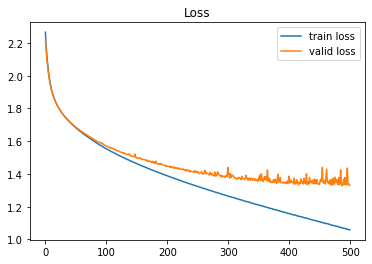

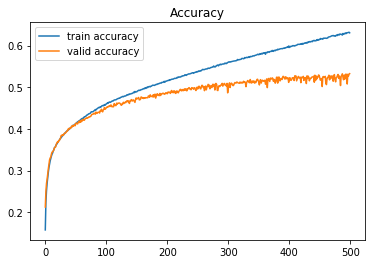

In [11]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Conclusion

 - Epoch 迭代越多次，大約超過 100 次以上，其 train 與 valid 震盪過大。